In [87]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.animation as ani
from matplotlib import pyplot
import random
from matplotlib import lines

from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count
import seaborn


In [88]:
def upper_columns(data):
    columns = data
    myList = []
    for name in columns:
        myList.append(name.upper())
    data.columns = myList

### Census.gov API Call

In [89]:
response = None
url1 = 'https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR&for=state:*'
url2 ='https://api.census.gov/data/timeseries/poverty/saipe?get=SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR&for=us'

url3 = 'https://api.census.gov/data/timeseries/poverty/saipe?get=NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR&for=county:*'

poverty_response1 = requests.get(url1)
poverty_response2 = requests.get(url2)
poverty_response3 = requests.get(url3)

Convert our api response to json

In [90]:
poverty_response_json1 = poverty_response1.json()
poverty_response_json2 = poverty_response2.json()
poverty_response_json3 = poverty_response3.json()

load Poverty Data in DF

In [91]:
poverty_state = pd.DataFrame(poverty_response_json1[1:], columns=poverty_response_json1[0])
poverty_nat = pd.DataFrame(poverty_response_json2[1:], columns=poverty_response_json2[0])
poverty_county = pd.DataFrame(poverty_response_json3[1:], columns=poverty_response_json3[0])

In [92]:
poverty_county.head(5).shape
poverty_county

,NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR,state,county
0,Autauga County,14.3,20.2,26898,1989,01,001
1,Baldwin County,13.2,18.6,24043,1989,01,003
2,Barbour County,26.2,38.2,18673,1989,01,005
3,Bibb County,18.9,25.0,19604,1989,01,007
4,Blount County,13.4,19.4,24035,1989,01,009
...,...,...,...,...,...,...,...
91108,Sweetwater County,9.2,9.7,74677,2021,56,037
91109,Teton County,5.9,5.5,102709,2021,56,039
91110,Uinta County,9.4,11.2,70162,2021,56,041
91111,Washakie County,10.2,12.5,62176,2021,56,043


In [93]:
poverty_state.head(5)

,NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR,state
0,Alabama,17.7,24.1,22202,1989,01
1,Alaska,10.6,15.4,33885,1989,02
2,Arizona,14.7,23.3,28924,1989,04
3,Arkansas,17.9,24.4,20729,1989,05
4,California,12.7,21.3,33474,1989,06


In [94]:
state_name_df = poverty_state[['NAME','state']]




In [95]:
state_name_df.rename(columns={'NAME': "STATE_NAME"}, inplace=True)

C:\Users\kendr\AppData\Local\Temp\ipykernel_38100\1187030159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_name_df.rename(columns={'NAME': "STATE_NAME"}, inplace=True)


In [96]:
state_name_df.head(5)

,STATE_NAME,state
0,Alabama,01
1,Alaska,02
2,Arizona,04
3,Arkansas,05
4,California,06


In [97]:
poverty_county_state = state_name_df.merge(poverty_county, on='state')

In [98]:
poverty_county_state.shape
poverty_county_state = poverty_county_state.drop_duplicates()

In [99]:
poverty_state = poverty_state.drop(columns='state')
poverty_nat = poverty_nat.drop(columns='us')
poverty_county_state = poverty_county_state.drop(columns='state')

poverty_county_state = poverty_county_state.drop(columns='county')

poverty_state = poverty_state.rename(columns={"NAME": "STATE", "SAEPOVRTALL_PT": "PR_ALL", "SAEPOVRT0_17_PT": "PR_YOUTH", 'SAEMHI_PT': 'MED_HH_INCOME' })
poverty_nat = poverty_nat.rename(columns={"NAME": "STATE", "SAEPOVRTALL_PT": "PR_ALL", "SAEPOVRT0_17_PT": "PR_YOUTH", 'SAEMHI_PT': 'MED_HH_INCOME' })

poverty_county_state = poverty_county_state.rename(columns={"NAME": "COUNTY", "SAEPOVRTALL_PT": "PR_ALL", "SAEPOVRT0_17_PT": "PR_YOUTH", 'SAEMHI_PT': 'MED_HH_INCOME' })

In [100]:
poverty_state = poverty_state.astype({'PR_ALL': float, 'PR_YOUTH': float, 'MED_HH_INCOME': float, 'YEAR': int})
poverty_nat = poverty_nat.astype({'PR_ALL': float, 'PR_YOUTH': float, 'MED_HH_INCOME': float, 'YEAR': int})
poverty_county_state = poverty_county_state.astype({'PR_ALL': float, 'PR_YOUTH': float, 'MED_HH_INCOME': float, 'YEAR': int})

In [101]:
print(poverty_state.dtypes)
print(poverty_nat.dtypes)
print(poverty_county_state.dtypes)

STATE             object
PR_ALL           float64
PR_YOUTH         float64
MED_HH_INCOME    float64
YEAR               int32
dtype: object
PR_ALL           float64
PR_YOUTH         float64
MED_HH_INCOME    float64
YEAR               int32
dtype: object
STATE_NAME        object
COUNTY            object
PR_ALL           float64
PR_YOUTH         float64
MED_HH_INCOME    float64
YEAR               int32
dtype: object


In [102]:
poverty_nat = poverty_nat[poverty_nat['YEAR'] >= 2017]
poverty_state = poverty_state[poverty_state['YEAR'] >= 2017]

# county_df = poverty_county_state[poverty_county_state['YEAR'] >= 2017]

In [103]:
poverty_state = poverty_state[poverty_state['STATE'] != 'Guam'] 
poverty_state = poverty_state[poverty_state['STATE'] != 'Puerto Rico'] 
poverty_state = poverty_state[poverty_state['STATE'] != 'Virgin Islands']
poverty_state = poverty_state[poverty_state['STATE'] != 'District of Columbia']

## Graphs for County Poverty

In [104]:
county_df = poverty_county_state
minnesota = county_df[county_df['STATE_NAME'] == 'Minnesota']
hennepin = minnesota[minnesota['COUNTY'] == 'Hennepin County']

In [105]:
hennepin = hennepin.drop_duplicates()

array([[<AxesSubplot:title={'center':'PR_ALL'}>,
        <AxesSubplot:title={'center':'PR_YOUTH'}>],
       [<AxesSubplot:title={'center':'MED_HH_INCOME'}>,
        <AxesSubplot:title={'center':'YEAR'}>]], dtype=object)

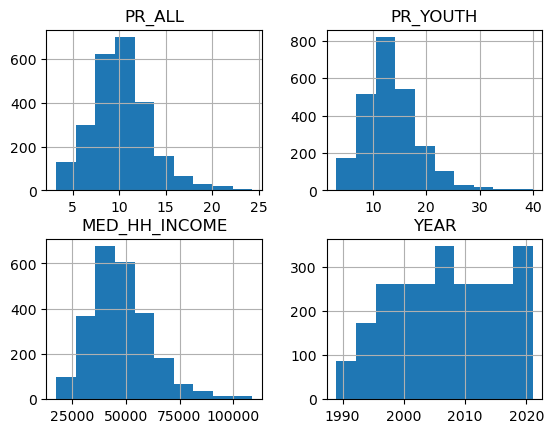

In [106]:
minnesota.hist(bins=10)

<AxesSubplot:xlabel='PR_ALL', ylabel='MED_HH_INCOME'>

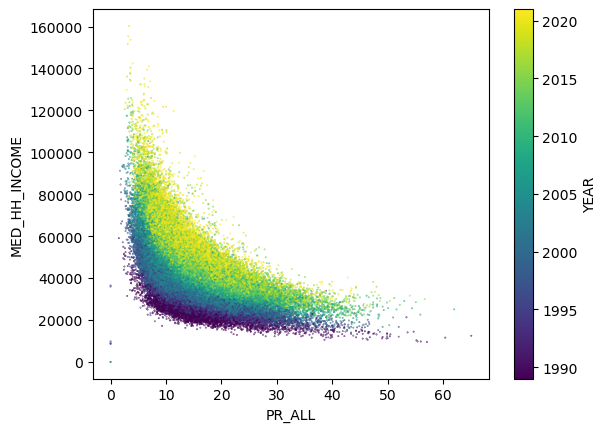

In [107]:
county_df.plot.scatter(y='MED_HH_INCOME', x='PR_ALL', c='YEAR', colormap='viridis', s=.1)


<AxesSubplot:xlabel='PR_ALL', ylabel='MED_HH_INCOME'>

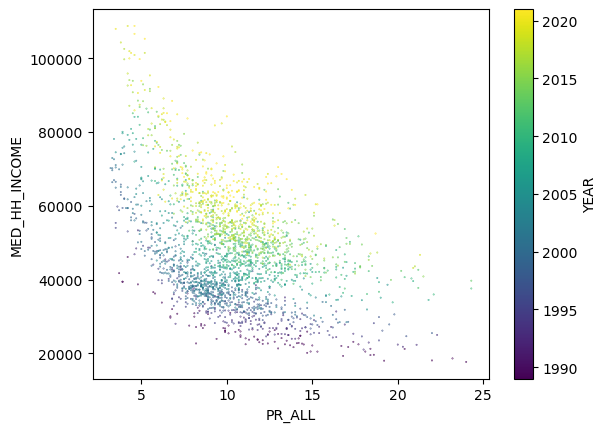

In [108]:
minnesota.plot.scatter(y='MED_HH_INCOME', x='PR_ALL', c='YEAR', colormap='viridis', s=.1)

<AxesSubplot:xlabel='YEAR', ylabel='MED_HH_INCOME'>

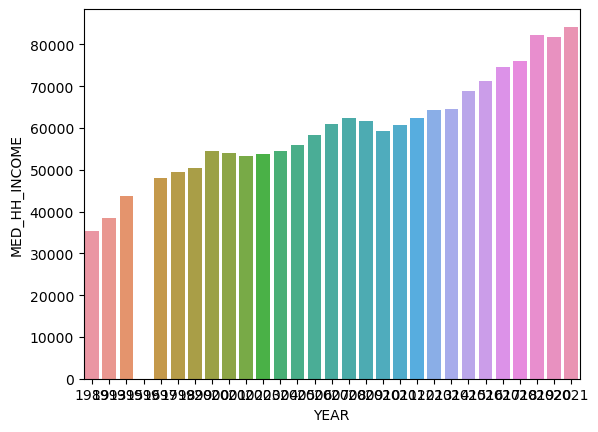

In [109]:
seaborn.barplot(x='YEAR', y='MED_HH_INCOME', data = hennepin)


<AxesSubplot:xlabel='PR_ALL', ylabel='YEAR'>

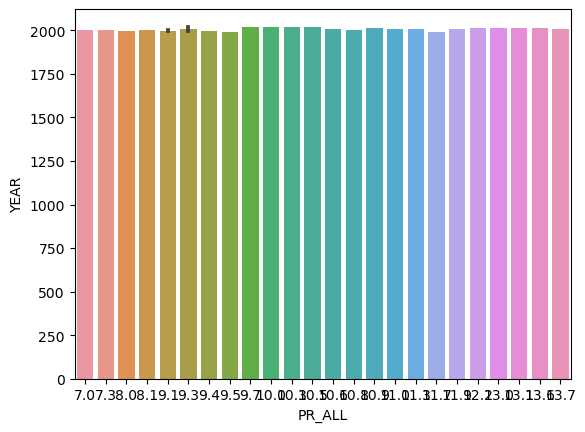

In [110]:
seaborn.barplot(y='YEAR', x='PR_ALL', data = hennepin)

In [111]:
poverty_county.columns

Index(['NAME', 'SAEPOVRTALL_PT', 'SAEPOVRT0_17_PT', 'SAEMHI_PT', 'YEAR',
       'state', 'county'],
      dtype='object')

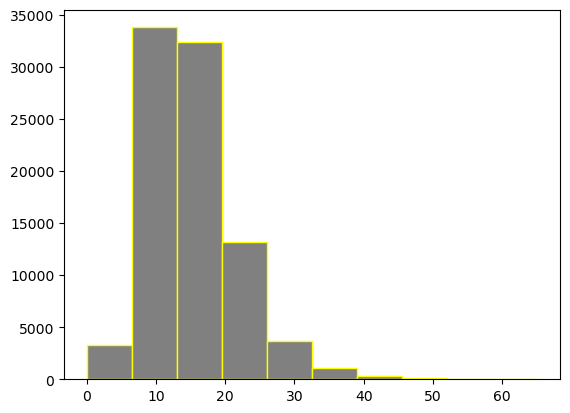

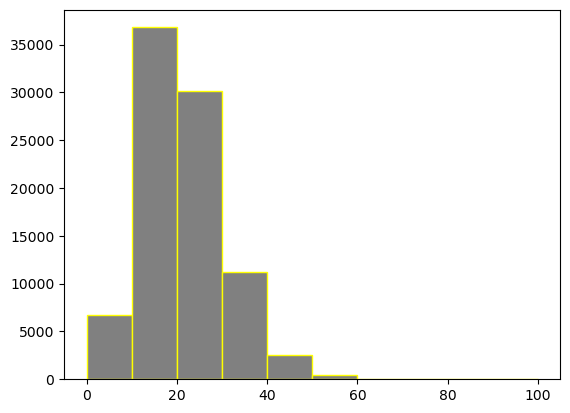

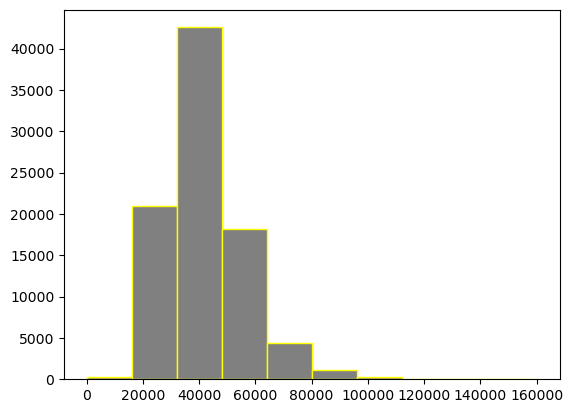

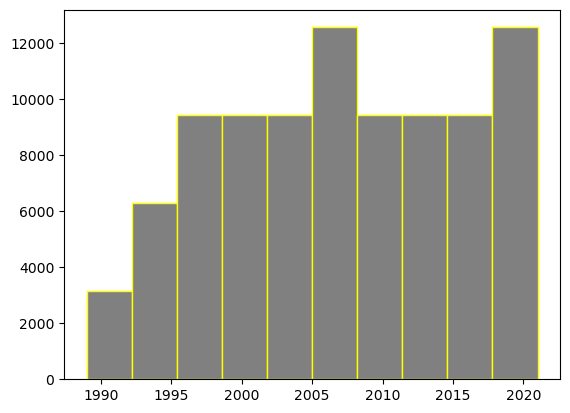

In [112]:
plt.hist(county_df['PR_ALL'], edgecolor="yellow", color="grey")
plt.show()
plt.hist(county_df['PR_YOUTH'], edgecolor="yellow", color="grey")
plt.show()
plt.hist(county_df['MED_HH_INCOME'], edgecolor="yellow", color="grey")
plt.show()
plt.hist(county_df['YEAR'], edgecolor="yellow", color="grey")
plt.show()

In [113]:
poverty_county

,NAME,SAEPOVRTALL_PT,SAEPOVRT0_17_PT,SAEMHI_PT,YEAR,state,county
0,Autauga County,14.3,20.2,26898,1989,01,001
1,Baldwin County,13.2,18.6,24043,1989,01,003
2,Barbour County,26.2,38.2,18673,1989,01,005
3,Bibb County,18.9,25.0,19604,1989,01,007
4,Blount County,13.4,19.4,24035,1989,01,009
...,...,...,...,...,...,...,...
91108,Sweetwater County,9.2,9.7,74677,2021,56,037
91109,Teton County,5.9,5.5,102709,2021,56,039
91110,Uinta County,9.4,11.2,70162,2021,56,041
91111,Washakie County,10.2,12.5,62176,2021,56,043


5 Highest Poverty levels by county

In [114]:
county_df = county_df.drop_duplicates()

In [115]:
county_df.nlargest(10,'PR_ALL')

,STATE_NAME,COUNTY,PR_ALL,PR_YOUTH,MED_HH_INCOME,YEAR
1985482,South Dakota,Shannon County,65.1,98.9,12501.0,1989
1986548,South Dakota,Ziebach County,62.0,76.7,25084.0,2009
934919,Louisiana,East Carroll Parish,60.4,88.9,11578.0,1989
1177135,Mississippi,Holmes County,57.1,75.6,9500.0,1989
1987076,South Dakota,Ziebach County,56.7,74.7,29985.0,2017
1177181,Mississippi,Tunica County,56.0,65.1,9749.0,1989
1986416,South Dakota,Ziebach County,55.9,66.6,22602.0,2007
834076,Kentucky,Owsley County,55.4,99.9,9782.0,1989
2121041,Texas,Starr County,55.2,67.5,10314.0,1989
1986802,South Dakota,Shannon County,55.1,53.4,28512.0,2013


In [116]:
uscounties_df = pd.read_csv("../data/uscounties.csv")

In [117]:
upper_columns(uscounties_df)

In [118]:
uscounties_df.head(5)

,COUNTY,COUNTY_ASCII,COUNTY_FULL,COUNTY_FIPS,STATE_ID,STATE_NAME,LAT,LNG,POPULATION
0,Los Angeles,Los Angeles,Los Angeles County,6037,CA,California,34.3209,-118.2247,10019635
1,Cook,Cook,Cook County,17031,IL,Illinois,41.8401,-87.8168,5265398
2,Harris,Harris,Harris County,48201,TX,Texas,29.8577,-95.3936,4697957
3,Maricopa,Maricopa,Maricopa County,4013,AZ,Arizona,33.3490,-112.4915,4367186
4,San Diego,San Diego,San Diego County,6073,CA,California,33.0343,-116.7350,3296317


In [119]:
county_df.head(5)

,STATE_NAME,COUNTY,PR_ALL,PR_YOUTH,MED_HH_INCOME,YEAR
0,Alabama,Autauga County,14.3,20.2,26898.0,1989
1,Alabama,Baldwin County,13.2,18.6,24043.0,1989
2,Alabama,Barbour County,26.2,38.2,18673.0,1989
3,Alabama,Bibb County,18.9,25.0,19604.0,1989
4,Alabama,Blount County,13.4,19.4,24035.0,1989


In [120]:
county_locs_df = county_df.merge(uscounties_df, how='left', left_on=['STATE_NAME', 'COUNTY'], right_on=['STATE_NAME', 'COUNTY_FULL'])

In [121]:
county_locs_df.head(3)

,STATE_NAME,COUNTY_x,PR_ALL,PR_YOUTH,MED_HH_INCOME,YEAR,COUNTY_y,COUNTY_ASCII,COUNTY_FULL,COUNTY_FIPS,STATE_ID,LAT,LNG,POPULATION
0,Alabama,Autauga County,14.3,20.2,26898.0,1989,Autauga,Autauga,Autauga County,1001.0,AL,32.5349,-86.6427,58239.0
1,Alabama,Baldwin County,13.2,18.6,24043.0,1989,Baldwin,Baldwin,Baldwin County,1003.0,AL,30.7276,-87.7226,227131.0
2,Alabama,Barbour County,26.2,38.2,18673.0,1989,Barbour,Barbour,Barbour County,1005.0,AL,31.8696,-85.3932,25259.0


In [122]:
county_final = county_locs_df[['STATE_NAME','YEAR','PR_ALL','PR_YOUTH','MED_HH_INCOME','COUNTY_FULL','LAT','LNG','POPULATION']]

Remove population data from all year except 2020

In [123]:
for i in range(len(county_final)):
    if county_final.loc[i, "YEAR"] != 2020:
        county_final.loc[i,'POPULATION'] = None

In [124]:
county_final['COUNTY_FULL'] = county_final['COUNTY_FULL'].str.upper()
county_final['COUNTY_FULL'] = county_final['COUNTY_FULL'].str.strip()
# county_final = county_final.replace(r'\s*(.*?)\s*', r'\1', regex=True)

C:\Users\kendr\AppData\Local\Temp\ipykernel_38100\708777367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_final['COUNTY_FULL'] = county_final['COUNTY_FULL'].str.upper()
C:\Users\kendr\AppData\Local\Temp\ipykernel_38100\708777367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_final['COUNTY_FULL'] = county_final['COUNTY_FULL'].str.strip()


In [125]:
county_final.head()

,STATE_NAME,YEAR,PR_ALL,PR_YOUTH,MED_HH_INCOME,COUNTY_FULL,LAT,LNG,POPULATION
0,Alabama,1989,14.3,20.2,26898.0,AUTAUGA COUNTY,32.5349,-86.6427,NaN
1,Alabama,1989,13.2,18.6,24043.0,BALDWIN COUNTY,30.7276,-87.7226,NaN
2,Alabama,1989,26.2,38.2,18673.0,BARBOUR COUNTY,31.8696,-85.3932,NaN
3,Alabama,1989,18.9,25.0,19604.0,BIBB COUNTY,32.9986,-87.1265,NaN
4,Alabama,1989,13.4,19.4,24035.0,BLOUNT COUNTY,33.9809,-86.5674,NaN


In [126]:
import matplotlib
import numpy as np
np.random.seed(seed=30)

cmap = matplotlib.cm.get_cmap('Spectral') # Getting a list of color values.

In [127]:
# def set_color(row):
#     if row["PR_ALL"] < 6:
#         return "black"
#     elif row["PR_ALL"] < 7:
#         return "purple"
#     elif row["PR_ALL"] < 8:
#         return "green"
#     elif row["PR_ALL"] < 9:
#         return "blue"
#     elif row["PR_ALL"] < 10:
#         return "yellow"
#     elif row["PR_ALL"] < 11:
#         return "cyan"
#     elif row["PR_ALL"] < 12:
#         return "orange"
#     elif row["PR_ALL"] < 13:
#         return "purple"
#     else:
#         return "red"
    

In [128]:
# color_dict = pd.Series({k:cmap(np.random.rand()) for k in county_final['PR_ALL'].unique()})
# color_dict.name = 'color_dict'

# county_final = pd.merge(county_final, color_dict, how='left', left_on='PR_ALL', right_index=True)

In [129]:
# county_final = county_final.assign(color_dict=county_final.apply(set_color, axis=1))

In [130]:
lowest10 = county_final.nsmallest(10,'PR_ALL')

In [131]:
import numpy as np
import matplotlib.pyplot as plt

In [132]:
county_final_2020 = county_final[county_final['YEAR'] == 2020]

In [133]:
county_final_2020

,STATE_NAME,YEAR,PR_ALL,PR_YOUTH,MED_HH_INCOME,COUNTY_FULL,LAT,LNG,POPULATION
1809,Alabama,2020,11.2,14.9,67565.0,AUTAUGA COUNTY,32.5349,-86.6427,58239.0
1810,Alabama,2020,8.9,12.4,71135.0,BALDWIN COUNTY,30.7276,-87.7226,227131.0
1811,Alabama,2020,25.5,37.5,38866.0,BARBOUR COUNTY,31.8696,-85.3932,25259.0
1812,Alabama,2020,17.8,21.9,50907.0,BIBB COUNTY,32.9986,-87.1265,22412.0
1813,Alabama,2020,13.1,18.9,55203.0,BLOUNT COUNTY,33.9809,-86.5674,58884.0
...,...,...,...,...,...,...,...,...,...
91085,Wyoming,2020,7.6,8.4,70583.0,SWEETWATER COUNTY,41.6595,-108.8796,42459.0
91086,Wyoming,2020,5.2,4.3,92488.0,TETON COUNTY,43.9346,-110.5898,23319.0
91087,Wyoming,2020,8.5,9.7,71246.0,UINTA COUNTY,41.2876,-110.5476,20514.0
91088,Wyoming,2020,9.7,10.7,58532.0,WASHAKIE COUNTY,43.9050,-107.6828,7768.0


<AxesSubplot:title={'center':'Poverty Rates vs Population 2020 by County'}, xlabel='Longitude', ylabel='Latitude'>

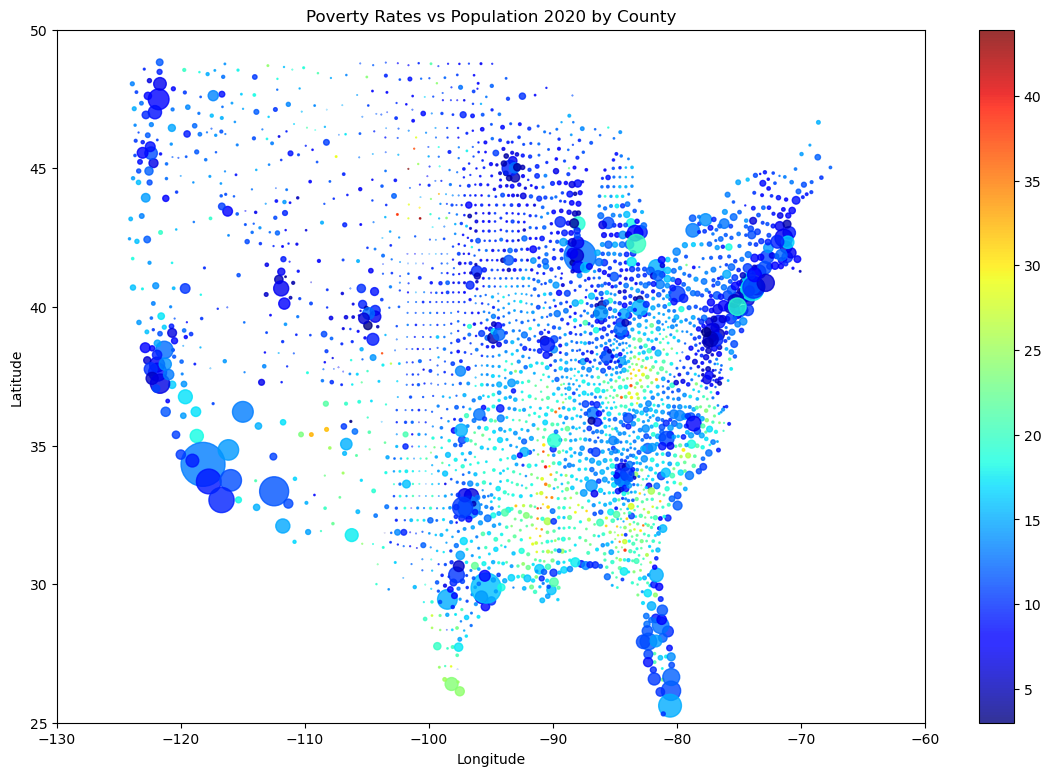

In [134]:



county_final_2020.plot.scatter(x='LNG', y='LAT', ylim=(25,50), xlim=(-130,-60),s=(county_final_2020['POPULATION']/10000),c=county_final_2020['PR_ALL'], colormap='jet',figsize=(14,9),alpha= 0.8, title="Poverty Rates vs Population 2020 by County", xlabel='Longitude',ylabel='Latitude')


In [135]:
AL_UE_df = pd.read_csv("../data/A-L_unemployment.csv")
MZ_UE_df = pd.read_csv("../data/M-Z_unemployment.csv")

In [136]:
al_transpose = AL_UE_df.transpose()
mz_transpose = MZ_UE_df.transpose()


In [137]:
unemployment_df = pd.concat([al_transpose, mz_transpose], axis=0)

In [138]:
header = unemployment_df.iloc[0]
unemployment_df2 = unemployment_df[1:]
unemployment_df2.columns = header
unemployment_df2.columns
unemployment_df2['STATE_NAME'] = "Minnesota"

C:\Users\kendr\AppData\Local\Temp\ipykernel_38100\3964193905.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_df2['STATE_NAME'] = "Minnesota"


In [139]:
ue_df = unemployment_df2.rename(columns={ '2022 Annual Avg.' : '2022', '2021 Annual Avg.': '2021', '2020 Annual Avg.' : '2020',
       '2019 Annual Avg.': '2019', '2018 Annual Avg.': '2018', '2017 Annual Avg.': '2017',
       '2016 Annual Avg.': '2016', '2015 Annual Avg.': '2015', '2014 Annual Avg.': '2014',
       '2013 Annual Avg.': '2013', '2012 Annual Avg.': '2012', '2011 Annual Avg.': '2011',
       '2010 Annual Avg.' : '2010', '2009 Annual Avg.': '2009', '2008 Annual Avg.': '2008',
       '2007 Annual Avg.': '2007', '2006 Annual Avg.': '2006', '2005 Annual Avg.': '2005',
       '2004 Annual Avg.': '2004', '2003 Annual Avg.': '2003', '2002 Annual Avg.': '2002',
       '2001 Annual Avg.': '2001'})

In [140]:
i = -1
num_list = []
for i in range(88):
    i += 1
    num_list.append(i)

In [141]:
ue_df['COUNTY_FULL'] = ue_df.index
ue_df.index = num_list

ue_df.columns

Index(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', 'STATE_NAME', 'COUNTY_FULL'],
      dtype='object', name='Year/Month')

In [142]:
ue_df.head(5)


Year/Month,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2008,2007,2006,2005,2004,2003,2002,2001,STATE_NAME,COUNTY_FULL
1,2.9,3.6,6.3,4.0,3.7,4.2,4.6,4.5,4.9,5.6,...,6.8,5.7,5.1,5.4,5.8,6.0,5.4,5.3,Minnesota,Becker County
2,3.6,4.4,7.3,4.5,4.2,4.8,5.3,5.0,5.4,6.1,...,6.7,5.7,5.2,5.8,6.4,6.4,6.2,5.7,Minnesota,Carlton County
3,2.7,3.1,4.8,3.8,3.7,3.5,4.3,4.2,4.9,5.7,...,4.8,4.1,3.7,3.9,4.4,4.4,3.7,4.0,Minnesota,Lac qui Parle County
4,2.4,3.1,4.8,3.2,2.9,3.2,3.5,3.5,3.8,4.5,...,5.0,4.4,3.8,3.8,3.9,3.9,3.7,3.6,Minnesota,Douglas County
5,3.5,4.8,8.4,4.3,3.5,3.9,4.6,4.5,5.8,5.9,...,5.6,4.8,4.4,4.4,4.8,4.9,4.8,4.7,Minnesota,Cook County


In [143]:
upper_columns(ue_df)

In [144]:
ue_df_unpivot = pd.melt(ue_df, id_vars=['COUNTY_FULL', 'STATE_NAME'], value_vars = ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001'])
    

In [145]:
ue_df_unpivot.head(5)

,COUNTY_FULL,STATE_NAME,variable,value
0,Becker County,Minnesota,2022,2.9
1,Carlton County,Minnesota,2022,3.6
2,Lac qui Parle County,Minnesota,2022,2.7
3,Douglas County,Minnesota,2022,2.4
4,Cook County,Minnesota,2022,3.5


In [146]:
ue_df_unpivot2 = ue_df_unpivot.rename(columns={ 'COUNTY': 'COUNTY_FULL', 'variable' : 'YEAR', 'value': 'UE_RATE', })

In [147]:
ue_df_unpivot3 = ue_df_unpivot2[ue_df_unpivot2.COUNTY_FULL != 'Year/Month']


In [148]:

ue_final = ue_df_unpivot3.astype({'YEAR': int, 'UE_RATE': float})

In [149]:
ue_final['COUNTY_FULL'] = ue_final['COUNTY_FULL'].str.upper()
ue_final['COUNTY_FULL'] = ue_final['COUNTY_FULL'].str.strip()
# ue_final = ue_final.replace(r'\s*(.*?)\s*', r'\1', regex=True)

In [150]:
county_ue_df = county_final.merge(ue_final, how='left', left_on=['COUNTY_FULL', 'STATE_NAME', 'YEAR'], right_on=['COUNTY_FULL', 'STATE_NAME', 'YEAR'])

In [151]:
county_ue_df['STATE_NAME'] == 'Minnesota'

0        False
1        False
2        False
3        False
4        False
         ...  
91108    False
91109    False
91110    False
91111    False
91112    False
Name: STATE_NAME, Length: 91113, dtype: bool

In [152]:
county_ue_df.to_csv('../output/county_poverty_unemployment.csv')
county_final.to_csv('../output/county_poverty.csv')
ue_final.to_csv('../output/unemployment.csv')

In [153]:
county_ue_df.head(5)

,STATE_NAME,YEAR,PR_ALL,PR_YOUTH,MED_HH_INCOME,COUNTY_FULL,LAT,LNG,POPULATION,UE_RATE
0,Alabama,1989,14.3,20.2,26898.0,AUTAUGA COUNTY,32.5349,-86.6427,NaN,NaN
1,Alabama,1989,13.2,18.6,24043.0,BALDWIN COUNTY,30.7276,-87.7226,NaN,NaN
2,Alabama,1989,26.2,38.2,18673.0,BARBOUR COUNTY,31.8696,-85.3932,NaN,NaN
3,Alabama,1989,18.9,25.0,19604.0,BIBB COUNTY,32.9986,-87.1265,NaN,NaN
4,Alabama,1989,13.4,19.4,24035.0,BLOUNT COUNTY,33.9809,-86.5674,NaN,NaN


In [158]:
county_ue_df['YEAR'].value_counts()

2021    3143
2010    3143
1993    3143
2011    3143
2012    3143
2013    3143
2009    3143
2020    3143
2017    3142
2018    3142
2015    3142
2014    3142
2019    3142
1996    3142
1995    3142
2008    3142
2016    3142
1989    3141
2006    3141
2005    3141
2004    3141
2003    3141
2002    3141
2001    3141
1999    3141
1998    3141
1997    3141
2007    3141
2000    3140
Name: YEAR, dtype: int64